# Hand Written Digit Recognition using SVM, Random Forests, PCA+SVM 

### Problem Statement

A classic problem in the field of pattern recognition is that of 
#### handwritten digit recognition. 
Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities. 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

#### Objective
We are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale



In [2]:
# Read the dataset
digits = pd.read_csv("train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Basic Data Exploration

In [3]:
digits.shape

(42000, 785)

##### A sample digit

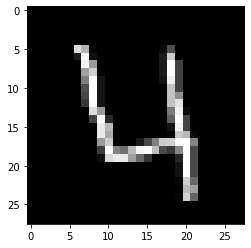

In [4]:
sample_digit = digits.iloc[3,1:]
sample_digit.shape
sample_digit = sample_digit.values.reshape(28,28)
plt.imshow(sample_digit, cmap='gray')

In [5]:
print(digits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
print(digits.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
np.sort(digits.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
digits[digits.isnull().sum(axis=1) > 0]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


##### No missing values in the data set

In [10]:
digits.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

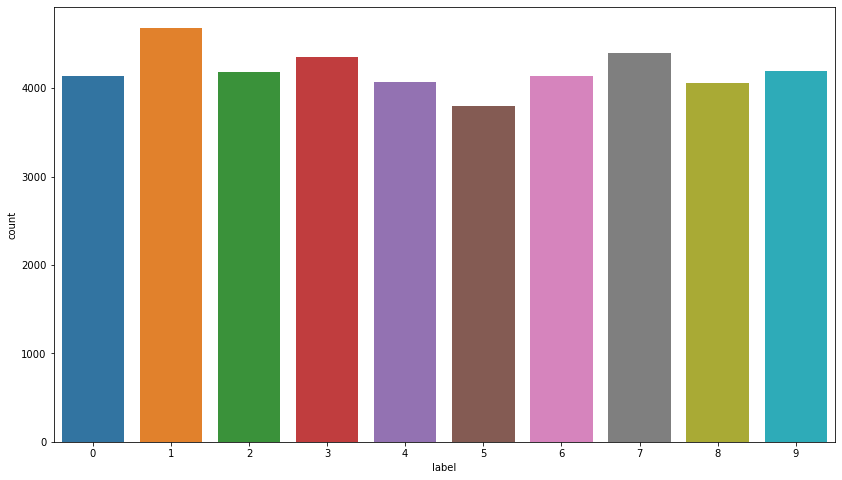

In [11]:
# # distribution of 'label' 
plt.figure(figsize=(14, 8))
sns.countplot(x="label", data=digits)

##### All the digits are distrubuted more or less uniformly with similar population

## 2. Data Preparation

##### Considering the computational limitations, let us use just 20000 images from the data set for training

In [12]:
X_full = digits.drop('label', axis=1)
X_limited = X_full.iloc[0:20000, :]
X_limited.shape

(20000, 784)

In [13]:
y_full = digits.label
y_limited = y_full[0:20000]

In [14]:
# Test, Train Split

X_train_ltd, X_test_ltd, y_train_ltd, y_test_ltd = train_test_split(X_limited, y_limited, test_size=0.3, random_state=100)

In [15]:
print(X_train_ltd.shape)
print(len(y_train_ltd))

(14000, 784)
14000


##### Re-Scale and standardize the pixel values as they are in varying ranges

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_ltd = scaler.fit_transform(X_train_ltd)

In [17]:
#### Apply the re-scaling transform to X_test 
X_test_ltd = scaler.transform(X_test_ltd)

## 3. Model Building

##### Let's start with the simplest SVM model - Linear without hyper-parameters

In [19]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train_ltd, y_train_ltd)

SVC(kernel='linear')

In [20]:
y_pred1 = linear_model.predict(X_test_ltd)
y_pred1

array([5, 3, 1, ..., 6, 2, 0], dtype=int64)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_ltd, y_pred=y_pred1), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test_ltd, y_pred=y_pred1))

accuracy: 0.9123333333333333 

[[561   0   2   0   1   3   5   0   3   0]
 [  0 696   3   1   0   0   1   4   2   1]
 [  6   7 564  13   3   2   5   4  11   0]
 [  0   4  21 535   0  18   4   3  22   4]
 [  2   2   7   1 542   0   6   5   0  18]
 [  5   3   6  31   7 430   7   0  12   3]
 [  8   0   9   0   3  15 557   0   3   0]
 [  1   3   7   5   9   1   0 557   2  29]
 [  4  16  10  27   5  16   2   4 507   8]
 [  2   2   3   5  26   4   0  24   5 525]]


##### The simple linear SVM model gives a very good accuracy of 91% and confusion matrix diagonal values indicate all the digits have been predicted almost correctly.

##### Let us try a non-linear model with RBF kernel

In [22]:
nonlinear_model = SVC(kernel='rbf')
nonlinear_model.fit(X_train_ltd, y_train_ltd)

SVC()

In [23]:
y_pred2 = nonlinear_model.predict(X_test_ltd)
y_pred2

array([5, 3, 1, ..., 6, 2, 0], dtype=int64)

In [24]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_ltd, y_pred=y_pred2), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test_ltd, y_pred=y_pred2))

accuracy: 0.9473333333333334 

[[557   0   9   1   0   2   3   0   3   0]
 [  0 692   8   1   0   0   2   4   1   0]
 [  4   4 587   4   0   1   3   5   6   1]
 [  0   2  23 566   0   3   2   4   9   2]
 [  1   1  12   0 548   1   3   1   0  16]
 [  1   0   7  14   2 465  10   0   4   1]
 [  4   0   9   0   0   4 576   0   2   0]
 [  0   4  16   4   4   0   0 574   1  11]
 [  1   2   8   5   5   5   1   4 561   7]
 [  0   1  11   3  11   0   0  11   1 558]]


##### The non-linear SVM model shows a significant improvement of accuracy to around 95% . Let us proceed with the hyper-parameter tuning on a non-linear model.

##### Grid Search: Hyperparameter Tuning¶
###### Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [25]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4],
                 'C': [1, 10, 100, 1000]}]

model = SVC(kernel='rbf')

cv = GridSearchCV(model, 
                  param_grid = hyper_params,
                  scoring = 'accuracy',
                  cv=folds, n_jobs=4,
                  return_train_score=True, verbose=True)

cv.fit(X_train_ltd, y_train_ltd)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 24.9min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 33.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [26]:
# cv results
cv_results = pd.DataFrame(cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,161.069611,0.551361,17.244679,0.078710,1,0.01,"{'C': 1, 'gamma': 0.01}",0.780714,0.772857,0.761429,...,0.775143,0.008396,12,0.999732,0.999643,0.999643,0.999821,0.999732,0.999714,0.000067
1,33.389364,0.212337,9.071820,0.023500,1,0.001,"{'C': 1, 'gamma': 0.001}",0.940000,0.937143,0.937857,...,0.938929,0.001195,4,0.974554,0.975179,0.974196,0.972857,0.975268,0.974411,0.000872
2,48.614676,1.026396,12.731678,0.153824,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.913571,0.912143,0.903929,...,0.910214,0.004283,8,0.921161,0.921696,0.924286,0.919821,0.923214,0.922036,0.001564
3,170.565204,1.091316,17.874541,0.358165,10,0.01,"{'C': 10, 'gamma': 0.01}",0.796786,0.785714,0.778214,...,0.791214,0.008489,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,29.156011,0.879529,8.346828,0.353218,10,0.001,"{'C': 10, 'gamma': 0.001}",0.953929,0.948929,0.948571,...,0.948357,0.003994,1,0.998661,0.998839,0.998750,0.998750,0.998393,0.998679,0.000154
5,22.671898,0.367209,7.930601,0.136903,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.932143,0.932143,0.929643,...,0.932000,0.003716,6,0.959554,0.961429,0.960357,0.957500,0.959911,0.959750,0.001289
6,167.582088,2.656326,17.728709,0.431077,100,0.01,"{'C': 100, 'gamma': 0.01}",0.796786,0.785714,0.778214,...,0.791214,0.008489,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,29.918983,0.510791,8.530432,0.068673,100,0.001,"{'C': 100, 'gamma': 0.001}",0.951786,0.948571,0.948571,...,0.948000,0.003489,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,17.024849,0.387123,6.420487,0.138601,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.938929,0.933571,0.933214,...,0.934857,0.003597,5,0.991696,0.990982,0.992321,0.990982,0.990893,0.991375,0.000555
9,173.039828,0.793174,18.367714,0.108508,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.796786,0.785714,0.778214,...,0.791214,0.008489,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


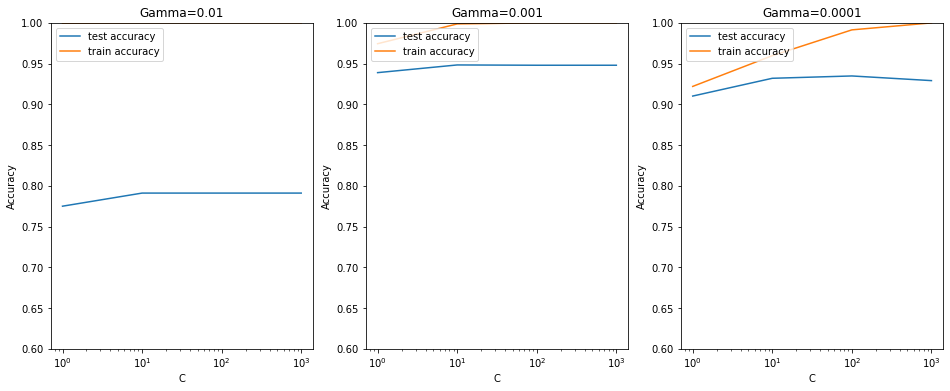

In [27]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##### We can see that Test accuracy is high with Gamma=0.001 and C=10

In [28]:
# printing the optimal accuracy score and hyperparameters
best_score = cv.best_score_
best_hyperparams = cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9483571428571429 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


##### Buid a model with the best values of the hyperparameters found above

In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train_ltd, y_train_ltd)

y_pred = model.predict(X_test_ltd)

# metrics
print("accuracy", metrics.accuracy_score(y_test_ltd, y_pred), "\n")
print(metrics.confusion_matrix(y_test_ltd, y_pred), "\n")

accuracy 0.9576666666666667 

[[566   0   2   0   0   2   3   0   2   0]
 [  0 692   8   0   0   0   2   5   1   0]
 [  0   6 593   1   0   2   2   6   4   1]
 [  0   1  19 574   0   4   2   5   5   1]
 [  1   2   5   0 555   2   3   1   0  14]
 [  3   1   5   8   2 472   5   0   6   2]
 [  4   0   7   0   1   3 579   0   1   0]
 [  0   2  13   2   4   0   0 584   1   8]
 [  1   3  10   6   4   5   3   2 559   6]
 [  0   1   8   2   5   0   0   7   1 572]] 



#### Conclusion
The final accuracy on test data is approx. 96%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just nearly half of that!).

### Random Forest Classifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=100)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
X_test = scaler.transform(X_test)

In [38]:
# Making predictions
predictions = rfc.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1242
           1       0.98      0.98      0.98      1424
           2       0.94      0.96      0.95      1199
           3       0.96      0.95      0.96      1296
           4       0.96      0.96      0.96      1204
           5       0.97      0.96      0.96      1178
           6       0.97      0.99      0.98      1250
           7       0.97      0.96      0.96      1284
           8       0.96      0.95      0.95      1236
           9       0.94      0.94      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [41]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[1229    0    3    1    3    0    4    0    2    0]
 [   0 1401    9    4    2    1    2    3    2    0]
 [   6    3 1146    5    8    2    5   11   11    2]
 [   3    4   19 1232    0   14    0    6   11    7]
 [   2    3    3    0 1153    0    9    3    5   26]
 [   2    2    0   14    5 1128   12    1    7    7]
 [   8    1    1    0    2    3 1232    0    2    1]
 [   1    6   21    1    7    1    0 1227    2   18]
 [   2    6    7   11    7   10    8    3 1169   13]
 [   5    3    5   15   19    4    0   12   13 1211]]


##### With Random Forests also, we see a high accuracy of 0.96

## PCA followed by SVM - Use sklearn pipline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

estimators = [('pca', PCA()), ('clf', SVC(kernel='rbf'))]

pipe = Pipeline(estimators)

param_grid = {
    'pca__n_components': [5, 10, 20, 40, 60, 80, 100, 120, 150],
    'clf__C': [1, 5, 7, 10, 100, 200, 500, 1000],
    'clf__gamma': [0.0005, 0.0008, 1e-3, 1e-4, 1e-2]
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=1, scoring='accuracy')

search.fit(X_train_ltd, y_train_ltd)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 44.7min finished


Best parameter (CV score=0.960):
{'clf__C': 10, 'clf__gamma': 0.001, 'pca__n_components': 80}


##### Apply PCA with best n_components number as found above 

In [43]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [44]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(29400, 80)

In [45]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(80, 80)

<AxesSubplot:>

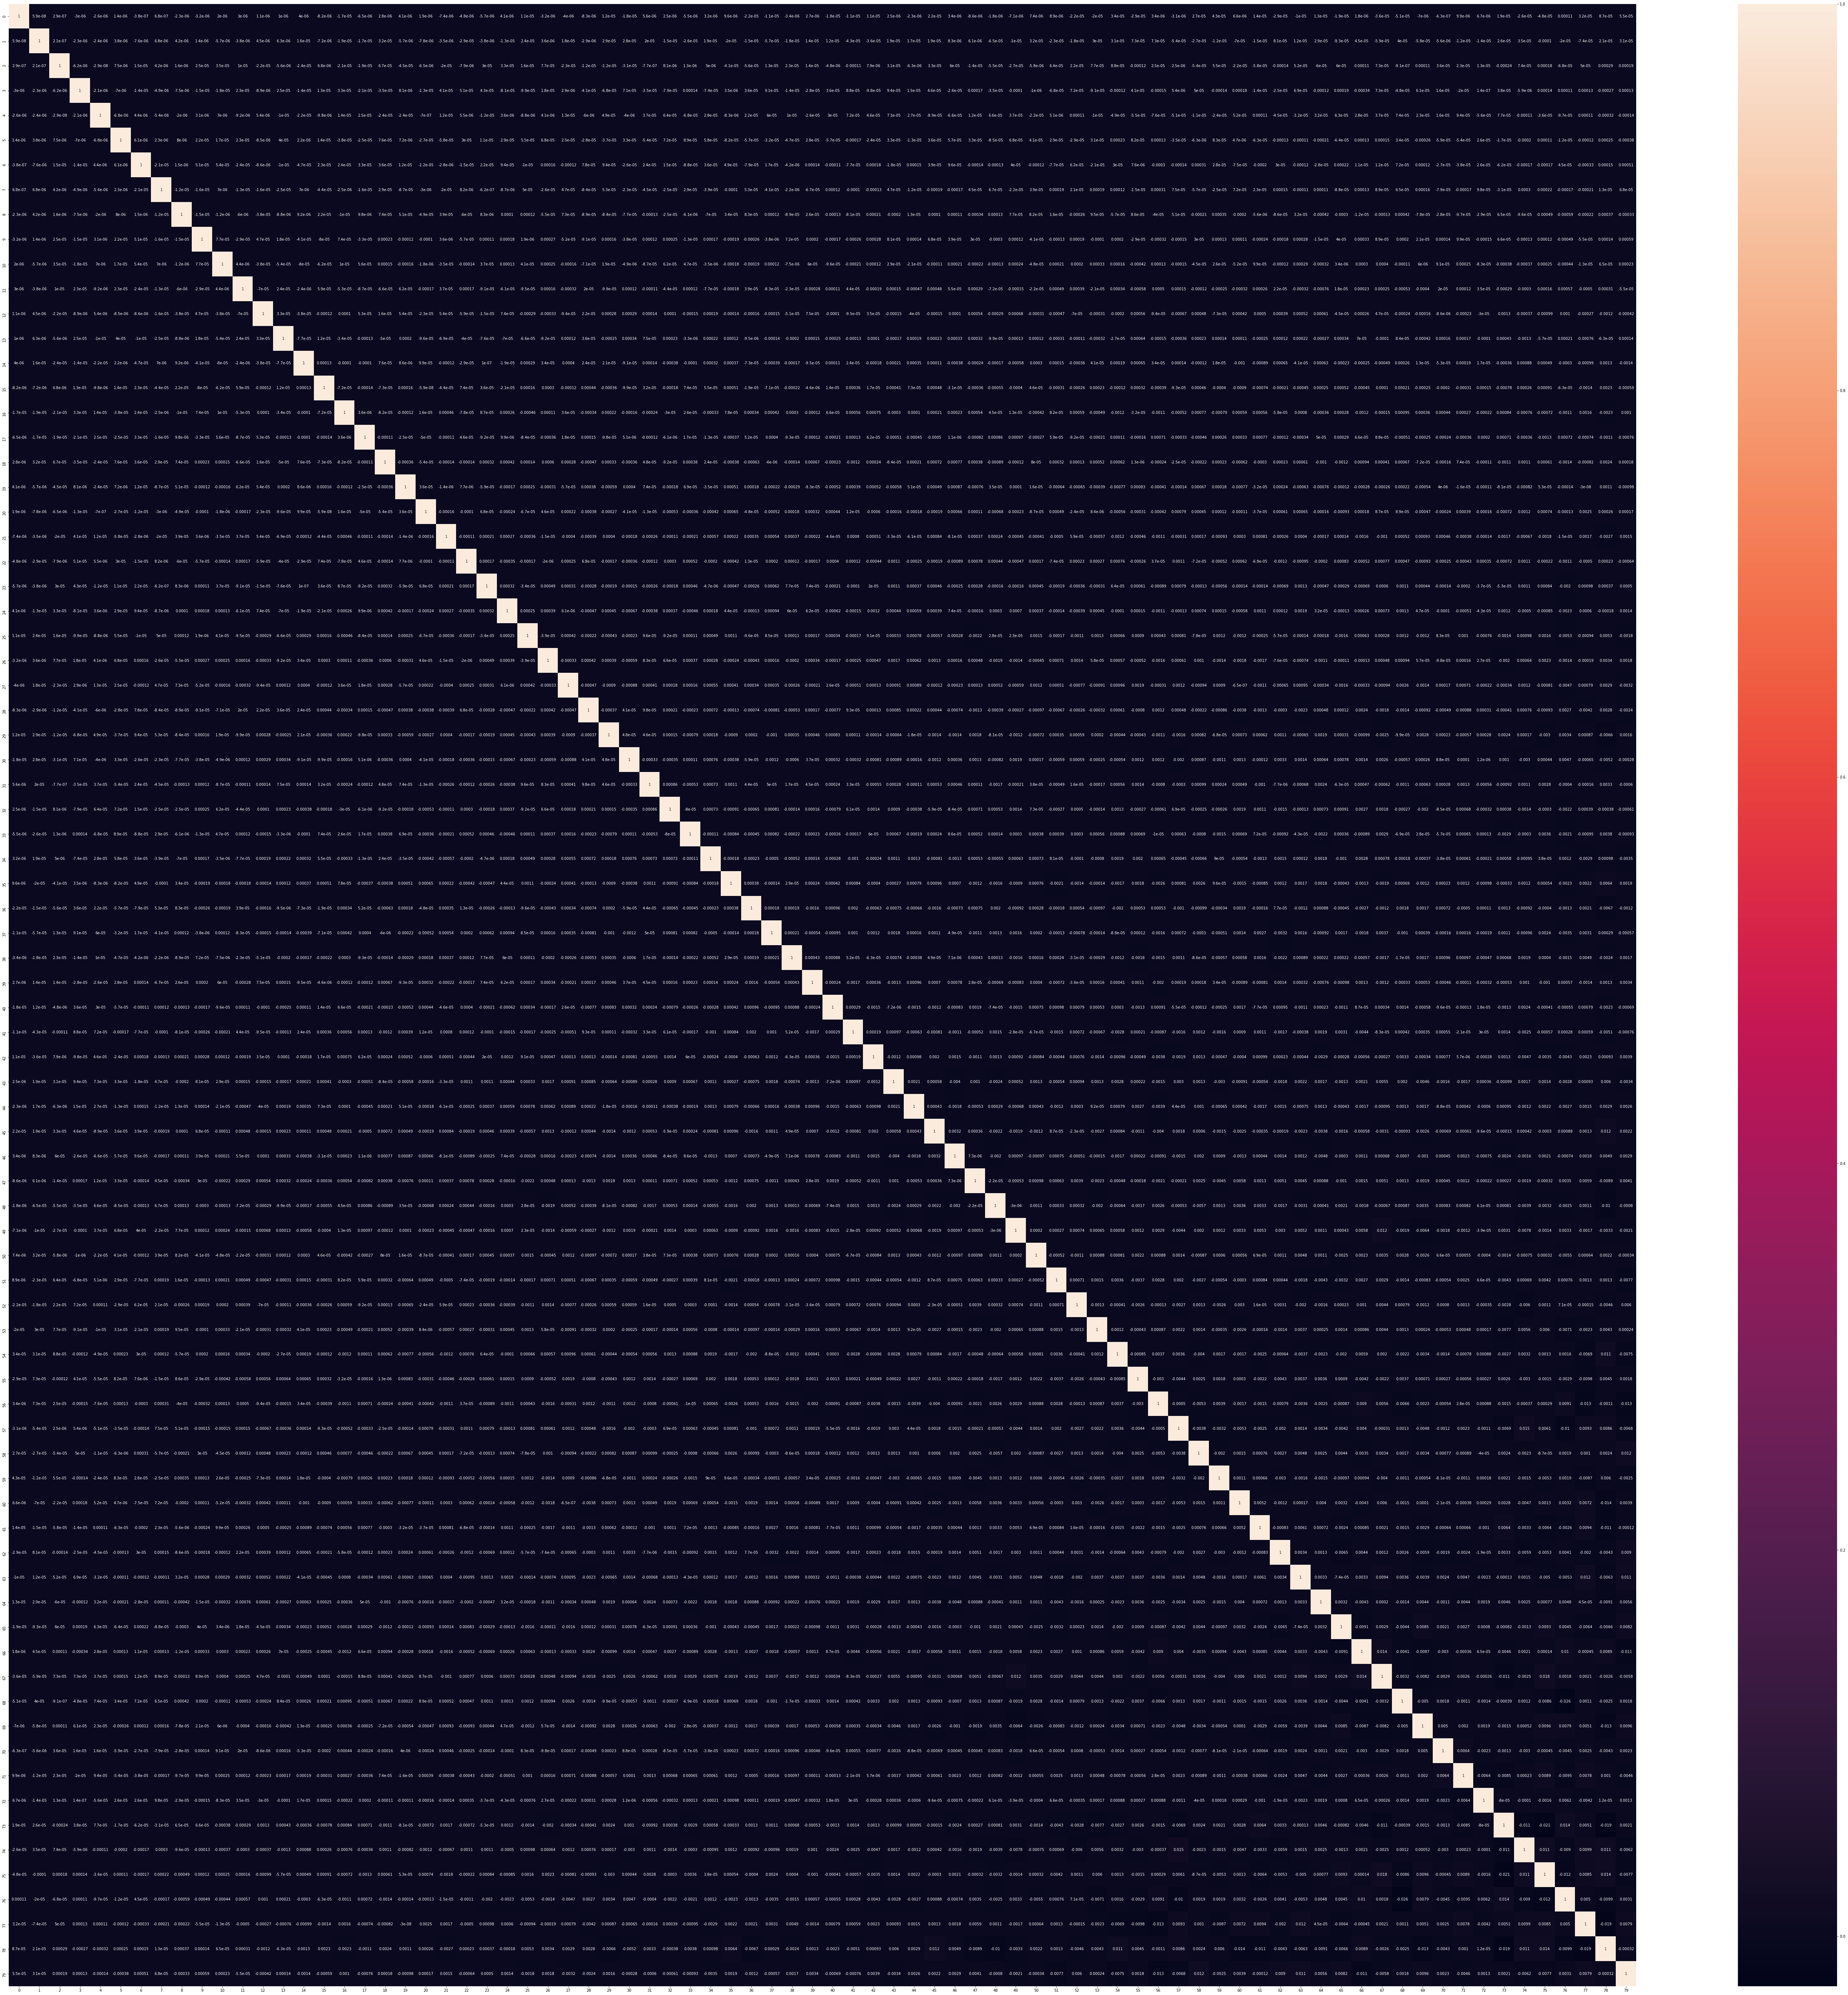

In [46]:
plt.figure(figsize=[100,100])
sns.heatmap(corrmat, annot=True)

After, PCA we see there is no correlation between principal components selected as seen above.

In [47]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(12600, 80)

#### Build a SVM model with best C and gamma hyper-params as found above.

In [48]:
svc_model_pca = SVC(C=10, gamma=0.001, kernel="rbf")

svc_model_pca.fit(X_train_pca, y_train)


SVC(C=10, gamma=0.001)

In [49]:
y_predictions_pca = svc_model_pca.predict(X_test_pca)
y_predictions_pca

array([5, 0, 2, ..., 5, 7, 7], dtype=int64)

In [50]:
print(classification_report(y_test, y_predictions_pca))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1242
           1       0.98      0.99      0.98      1424
           2       0.96      0.96      0.96      1199
           3       0.97      0.96      0.96      1296
           4       0.96      0.97      0.96      1204
           5       0.97      0.97      0.97      1178
           6       0.98      0.99      0.98      1250
           7       0.95      0.97      0.96      1284
           8       0.97      0.95      0.96      1236
           9       0.96      0.95      0.95      1287

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [51]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_predictions_pca))

[[1226    0    5    0    1    3    4    1    2    0]
 [   0 1405    8    2    0    0    1    4    3    1]
 [   4    3 1153    9    2    2    1   11    9    5]
 [   1    1    9 1250    1   10    2    4   13    5]
 [   1    3    5    0 1163    0    5    8    1   18]
 [   2    4    0   14    2 1138   10    2    3    3]
 [   4    2    0    0    3    3 1236    1    1    0]
 [   1    6   12    1    7    0    1 1246    1    9]
 [   3    6    8   15    9   11    3    4 1172    5]
 [   3    5    4    4   20    3    1   24    6 1217]]


##### Using PCA, we could reduce the features (dimensions) from 784 to just 80 and also achieve a high accuracy of 0.97